## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string


## Loading and Preprocessing the data

In [2]:
df= pd.read_csv("Fake.csv", error_bad_lines= False)
df.head()


<ipython-input-2-7b883eec97fe>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df= pd.read_csv("Fake.csv", error_bad_lines= False)


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [3]:
dt= pd.read_csv("True.csv")
dt.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
df["class"]=0
dt["class"]=1

In [5]:
df.shape , dt.shape

((23481, 5), (21417, 5))

In [6]:
#Removing last 10 rows and putting them in a new dataframe for testing purpose
df_manual_testing= df.tail(10)
for i in range (23480, 23470, -1):
  df.drop([i], axis =0, inplace = True)

dt_manual_testing= dt.tail(10)
for i in range (21416, 21406, -1):
  dt.drop([i], axis =0, inplace = True)

In [7]:
df.shape , dt.shape

((23471, 5), (21407, 5))

In [8]:
df_manual_testing['class'] = 0
dt_manual_testing['class'] = 1

<ipython-input-8-f09f497c3d0d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_manual_testing['class'] = 0
<ipython-input-8-f09f497c3d0d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_manual_testing['class'] = 1


In [9]:
df_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [10]:
dt_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [11]:
data_merge = pd.concat([df , dt], axis = 0)
data_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [12]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [13]:
data = data_merge.drop(['title','date','subject'],axis=1)

In [14]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [15]:
data = data.sample(frac=1)
data.head()

,text,class
7316,CHICAGO (Reuters) - Illinois Governor Bruce Ra...,1
9284,MIAMI (Reuters) - President Barack Obama warne...,1
18174,BANGKOK (Reuters) - Thailand s ousted former P...,1
19514,SANTO DOMINGO (Reuters) - Dominican Republic c...,1
21048,MOSCOW (Reuters) - Russian President Vladimir ...,1


In [16]:
data.reset_index(inplace = True)
data.drop(['index'], axis=1 , inplace=True)

In [17]:
data.head()

,text,class
0,CHICAGO (Reuters) - Illinois Governor Bruce Ra...,1
1,MIAMI (Reuters) - President Barack Obama warne...,1
2,BANGKOK (Reuters) - Thailand s ousted former P...,1
3,SANTO DOMINGO (Reuters) - Dominican Republic c...,1
4,MOSCOW (Reuters) - Russian President Vladimir ...,1


## Text Processing-
This next section of the code defines a function- wordopt; that preprocesses the text data which is taken as input and converts all the text to lowercase, removes URLs, HTML tags, punctuations, digits and stopwords from it

In [18]:
def wordopt(text):
  text = text.lower()
  text = re.sub('\[.*?/','', text)
  text = re.sub("\\W"," ", text)
  text = re.sub('https?://\S+|www\.\S+', '', text)
  text = re.sub('<.*?>+','', text)
  text = re.sub('[%s]' % re.escape(string.punctuation),'', text)
  text = re.sub('\n','', text)
  text = re.sub('\w*\d\w*','', text)
  return text

In [19]:
#applying wordopt function on "text" column of the data
data['text'] = data['text']. apply(wordopt)

## Splitting Data into Traing and Testing sets using train_test_split from sklearn

In [20]:
#Separating the "text" column as input features "x" and "class" column as target variable "y".
x = data['text']
y = data['class']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.25)

## Machine Learning Model

In [22]:
#Goal- convert Textual data into Numerical data through vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [23]:
y_train

10076    1
36136    1
41504    0
37095    1
39096    0
        ..
10785    1
2682     1
14159    1
21983    0
41328    0
Name: class, Length: 33658, dtype: int64

In [24]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [25]:
pred_lr = LR.predict(xv_test)

In [26]:
LR.score(xv_test, y_test)

0.9872549019607844

In [27]:
print(classification_report(y_test, pred_lr)) 

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5834
           1       0.98      0.99      0.99      5386

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [28]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(xv_train,y_train)

DecisionTreeClassifier()

In [29]:
pred_DT = DT.predict(xv_test)

In [30]:
DT.score(xv_test, y_test)

0.9953654188948307

In [31]:
print(classification_report(y_test, pred_DT)) 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5834
           1       1.00      0.99      1.00      5386

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [32]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(random_state = 0)
RF.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [33]:
pred_rf = RF.predict(xv_test)

In [34]:
RF.score(xv_test, y_test)

0.9885918003565063

In [35]:
print(classification_report(y_test, pred_rf)) 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5834
           1       0.99      0.99      0.99      5386

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



## Model Testing

In [41]:
def output_label(n):
  if n == 0:
    return "Fake News!"
  elif n == 1:
    return "Not a Fake News"

def manual_testing(news):
  testing_news = {"text":[news]}
  new_def_test = pd.DataFrame(testing_news)
  new_def_test["text"] = new_def_test["text"].apply(wordopt)
  new_x_test = new_def_test["text"]
  new_xv_test = vectorization.transform(new_x_test)
  pred_lr = LR.predict(new_xv_test)
  pred_DT = DT.predict(new_xv_test)
  pred_rf = RF.predict(new_xv_test)

  return print("\n\nLR Prediction: {} \nDT Prediction: {} \nRF Prediction: {}" .format(output_label(pred_lr[0]),
                                                                                                           output_label(pred_DT[0]),
                                                                                                           output_label(pred_rf[0])))

In [37]:
news = str(input())
manual_testing(news)

Senate Majority Whip John Cornyn (R-TX) thought it would be a good idea to attack Special Counsel Robert Mueller over the Russia probe. As Mueller s noose tightens, Republicans are losing their sh-t and attacking Mueller and the FBI in order to protect probably the most corrupt  president  ever.Former Attorney General Eric Holder tweeted on Friday,  Speaking on behalf of the vast majority of the American people, Republicans in Congress be forewarned: any attempt to remove Bob Mueller will not be tolerated. Cornyn retweeted Holder to say,  You don t. You don t https://t.co/7lHYkIloyz  Senator JohnCornyn (@JohnCornyn) December 16, 2017Bloomberg s Steven Dennis tweeted on Saturday that  [Cornyn] s beef is with Holder, not Mueller,  but Cornyn responded to say,  But Mueller needs to clean house of partisans. But Mueller needs to clean house of partisans https://t.co/g8SwgAKtfH  Senator JohnCornyn (@JohnCornyn) December 16, 2017The Washington Post s Greg Sargent asked Cornyn,  Will you acce

In [38]:
news = str(input())
manual_testing(news)

(Reuters) - A gift-wrapped package addressed to U.S. Treasury Secretary Steven Mnuchinâ€™s home in a posh Los Angeles neighborhood that was suspected of being a bomb was instead filled with horse manure, police told local media. The package was found Saturday evening in a next-door neighborâ€™s driveway in Bel Air, the Los Angeles Police Department told the Los Angeles Times and KNBC television, the NBC affiliate in Los Angeles. The package also included a Christmas card with negative comments about President Donald Trump and the new U.S. tax law signed by Trump last week. Reuters could not reach LAPD officials for comment on Sunday. An LAPD bomb squad X-rayed the package before opening it and found the horse manure inside, police told local media. Aerial footage from KNBC showed officers investigating a large box in wrapping paper, then dumping a large amount of what they later identified as the manure and opening the card that was included inside.  Mnuchin, who KNBC said was not home

In [40]:
news = str(input())
manual_testing(news)
#news taken from google(outside the dataset)

Russia accused Ukraine of attempting a drone strike on the Kremlin with the aim of killing president Vladimir Putin, news agency Reuters reported quoting Russian news agencies. The Kremlin said it considered the attack to be a "planned terrorist action", RIA reported, adding that two drones had been used in the attack. Both had been disabled by Russian defences, the Kremlin was quoted as saying.


LR Prediction: Not a Fake News 
DT Prediction: Not a Fake News 
RF Prediction: Not a Fake News


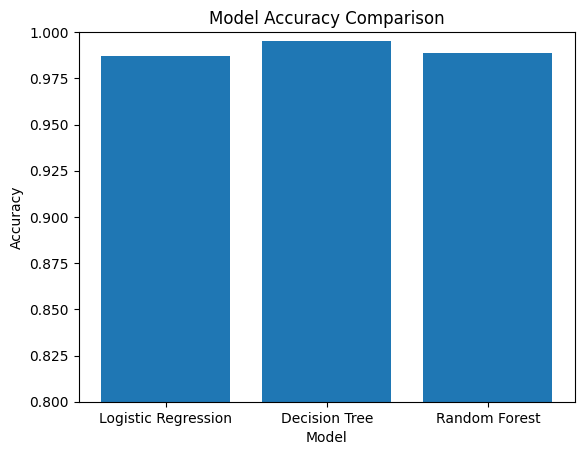

In [42]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Calculate accuracy scores for the three models
lr_accuracy = accuracy_score(y_test, pred_lr)
dt_accuracy = accuracy_score(y_test, pred_DT)
rf_accuracy = accuracy_score(y_test, pred_rf)

# Create a bar graph to compare the accuracy of the models
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [lr_accuracy, dt_accuracy, rf_accuracy]

plt.bar(models, accuracies)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.show()
